Jupyter Notebook for an exploration into gun violence in America. Full report found here:

https://docs.google.com/document/d/1oLQJOiCuxEH5bDs8qPLMi0rDQWZBfGgGHTvyn5hPacw/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#School shooters by year, via Center for Homeland Defense and Security

#read in data
k12 = pd.read_csv('CHDS_K12_SchoolShootings.csv', parse_dates=['Date'])

#update column names & then count by year
k12.columns = k12.columns.str.strip().str.lower().str.replace(' ', '_')

k12['year'] = pd.DatetimeIndex(k12['date']).year
k12.dropna(axis=0, how='all', inplace=True)
k12.tail()

group1 = k12.groupby('year')
group1 = group1.count()


In [3]:
group1.head()

,date,school,city,state,killed_(includes_shooter),wounded,total_injured/killed_victims,category,school_type,location,firearm_type,number_of_shooters,shooter_age,shooter_gender,race
year,,,,,,,,,,,,,,,
1970,20,20,20,20,20,20,20,18,20,20,19,18,12,18,3
1971,21,21,21,21,21,21,21,19,21,20,20,21,17,20,5
1972,18,18,18,18,18,18,18,17,18,18,13,16,13,16,4
1973,18,18,18,18,18,18,18,17,18,17,16,17,12,16,3
1974,16,16,16,16,16,16,16,14,16,14,14,14,12,15,4


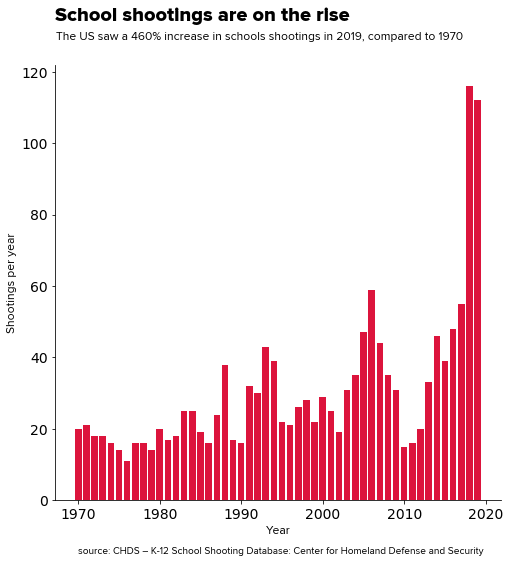

In [4]:
#Visualize data with bar plot

#Create figure & bar
fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(group1.index, group1['date'], color='#DC143C')

#Add title 
plt.title('School shootings are on the rise', loc='left', pad=45,
         fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova')

#add labels
plt.ylabel('Shootings per year', fontsize=12, fontname='Proxima Nova')
plt.xlabel('Year', fontsize=12, fontname='Proxima Nova')


#add annotations
plt.text(1967.3,129,'The US saw a 460% increase in schools shootings in 2019, compared to 1970',
         fontsize=12, ha='left', fontname='Proxima Nova')

plt.text(1970,-15,'source: CHDS – K-12 School Shooting Database: Center for Homeland Defense and Security',
         fontsize=10, ha='left', fontname='Proxima Nova')

#and stylings
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()



In [5]:
#Mass shootings 1982-Present, via Mother Jones

ms = pd.read_csv('Mother Jones - Mass Shootings Database, 1982 - 2020 - Sheet1.csv', parse_dates=['date'], index_col='date')


c = ms['case'].resample('Y').count()

c


date
1982-12-31     1
1983-12-31     0
1984-12-31     2
1985-12-31     0
1986-12-31     1
1987-12-31     1
1988-12-31     1
1989-12-31     2
1990-12-31     1
1991-12-31     3
1992-12-31     2
1993-12-31     4
1994-12-31     1
1995-12-31     1
1996-12-31     1
1997-12-31     2
1998-12-31     3
1999-12-31     5
2000-12-31     1
2001-12-31     1
2002-12-31     0
2003-12-31     1
2004-12-31     1
2005-12-31     2
2006-12-31     3
2007-12-31     4
2008-12-31     3
2009-12-31     4
2010-12-31     1
2011-12-31     3
2012-12-31     7
2013-12-31     5
2014-12-31     4
2015-12-31     7
2016-12-31     6
2017-12-31    11
2018-12-31    12
2019-12-31    10
Freq: A-DEC, Name: case, dtype: int64

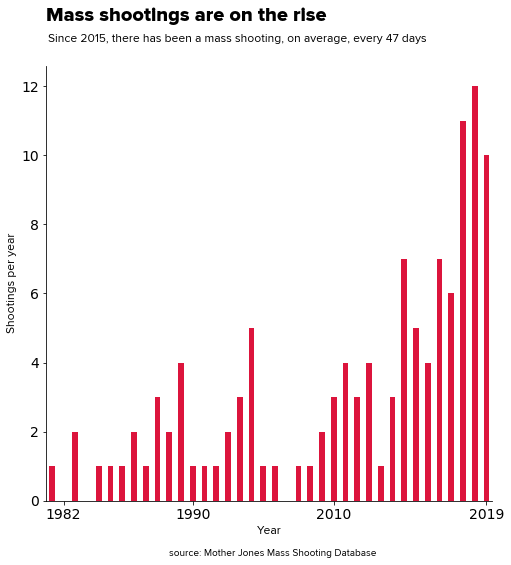

In [6]:
#Create figure & bar

fig, ax = plt.subplots(figsize=(8, 8))
c.plot.bar(x=c.index, y=c, color='#DC143C')


#Add title 
plt.title('Mass shootings are on the rise', loc='left', pad=45,
         fontdict={'fontsize':20, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova')

#Add annotations
plt.text(10,-1.6,'source: Mother Jones Mass Shooting Database',
         fontsize=10, ha='left', fontname='Proxima Nova')

plt.text(-0.29,13.3,'Since 2015, there has been a mass shooting, on average, every 47 days',
          fontsize=12, ha='left', fontname='Proxima Nova')

#Add labels & styling
plt.ylabel('Shootings per year', fontsize=12, fontname='Proxima Nova')
plt.xlabel('Year', fontsize=12, fontname='Proxima Nova')


plt.yticks(fontsize=14)
plt.xticks([1, 12, 24, 37], ['1982', '1990', '2010', '2019']
         , fontsize=14, rotation=0, ha='center')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_xticks()

plt.show()

In [7]:
#read in data for gun death types
homicides = pd.read_csv('Gun Deaths by Homicide.csv')
suicides = pd.read_csv('Gun Deaths by Suicide.csv')
other = pd.read_csv('Gun Deaths--Other.csv')

In [8]:
#compare size of populations
homicides['type'] = 'Homicide'
suicides['type'] = 'Suicide'
other['type'] = 'Other'

frames = [homicides, suicides, other]
deaths = pd.concat(frames)

deaths.columns = deaths.columns.str.strip().str.lower().str.replace(' ', '_')

deaths


,year,deaths,population,crude_rate,age_adjusted_rate,type
0,1999,10828,279040168,3.9,3.8,Homicide
1,2000,10801,281421906,3.8,3.8,Homicide
2,2001,11348,284968955,4.0,3.9,Homicide
3,2002,11829,287625193,4.1,4.1,Homicide
4,2003,11920,290107933,4.1,4.1,Homicide
5,2004,11624,292805298,4.0,4.0,Homicide
6,2005,12352,295516599,4.2,4.2,Homicide
7,2006,12791,298379912,4.3,4.3,Homicide
8,2007,12632,301231207,4.2,4.2,Homicide
9,2008,12179,304093966,4.0,4.1,Homicide


In [9]:
#importing everything for tree map
import squarify
import matplotlib.pyplot as plt
from vega_datasets import data as vds
import pygal
%matplotlib inline



In [10]:
deaths2 = deaths[deaths['year'] == 2018]
deaths2


,year,deaths,population,crude_rate,age_adjusted_rate,type
19,2018,13958,327167434,4.3,4.4,Homicide
19,2018,24432,327167434,7.5,7.0,Suicide
19,2018,1350,327167434,0.4,0.4,Other


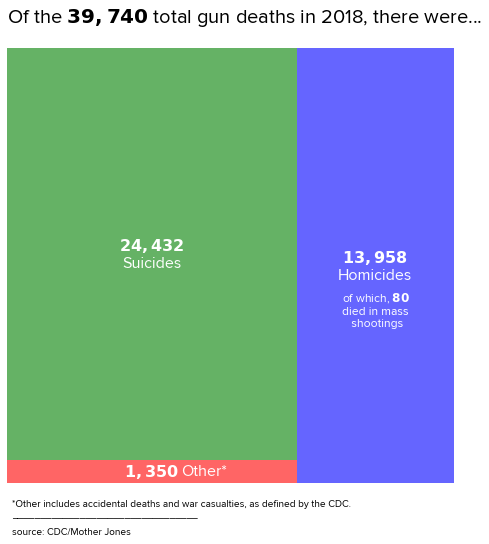

In [13]:
#treemap for counts of shooting types
fig, ax = plt.subplots(figsize=(8, 8))

#colors for tree map
color=["red","green","blue"]


sizes2=deaths2['deaths'].tolist()
#switching list order so that it comes out correctly on tree map
sizes2[0], sizes2[2] = sizes2[2], sizes2[0]


#create list of labels
label2=deaths2['type'].tolist()
label2[0], label2[2] = label2[2], label2[0]


#then format labels to bold the death counts
label2[2] = r"$\bf{13,958}$" +  '\nHomicides'
label2[1] = r"$\bf{24,432}$" +  '\nSuicides'
label2[0] = r"$\bf{1,350}$" 


#make plot
squarify.plot(
    sizes=sizes2,
    color=color,
    label=label2,
    pad=False,
    text_kwargs={'fontsize':16, 'fontname':"Proxima Nova",'color':'white'},
    alpha=0.6
    )


#add title and annotations
plt.title('Of the ' + r"$\bf{39,740}$" + ' total gun deaths in 2018, there were...', loc='left', pad=25,
         fontdict={'fontsize':20, 'fontweight':'normal', 'family':'sans-serif' }, fontname='Proxima Nova')


plt.text(1,-8,'*Other includes accidental deaths and war casualties, as defined by the CDC.' + 
         '\n_________________________________',
         fontsize=10, ha='left', fontname='Proxima Nova')

plt.text(1,-12,'source: CDC/Mother Jones',
         fontsize=10, ha='left', fontname='Proxima Nova')


plt.text(75,36,'of which, ' + r"$\bf{80}$" + '\ndied in mass \n   shootings',
         fontsize=12, ha='left', fontname='Proxima Nova', color='white')

plt.text(39,1.6,'Other*',
         fontsize=16, ha='left', fontname='Proxima Nova', color='white')


plt.axis('off')
plt.show()


In [39]:
#graph with Plotly
import plotly.graph_objects as go 

df3 = pd.read_csv('Gun Suicides, 2010-2018, by State.csv')


fig = go.Figure(data=go.Choropleth(
    locations=df3['Code'], # Spatial coordinates
    z = df3['Crude Rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Deaths per 100k",
))

fig.update_layout(
    title_text = '<b>Gun suicide rates are highest in the west, 2010-2018</b>',
    geo_scope='usa', # limite map scope to USA
)


fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="source: CDC",
            xref="paper",
            yref="paper",

        )
    ]
)

fig.show()


In [38]:
#graph with Plotly
import plotly.graph_objects as go 

df2 = pd.read_csv('Homicides by Gun, 2010-2018, by State.csv')


fig = go.Figure(data=go.Choropleth(
    locations=df2['Code'], # Spatial coordinates
    z = df2['Crude Rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Deaths per 100k",
))

fig.update_layout(
    
    geo_scope='usa', # limite map scope to USA,
    title={
        'text':'<b>Gun homicide rates are highest in the south, 2010-2018</b>',
        'xanchor':'left',
        'yanchor':'bottom'
    }
)

fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="source: CDC",
            xref="paper",
            yref="paper",

        )
    ]
)


fig.show()

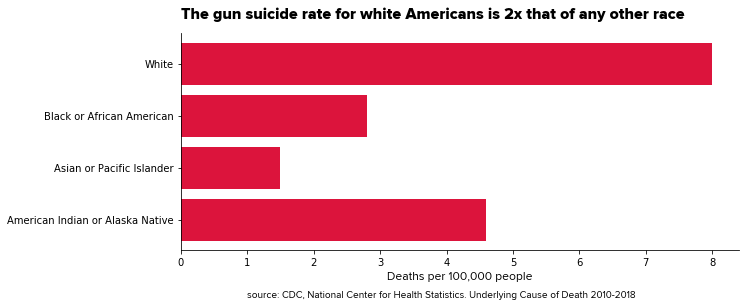

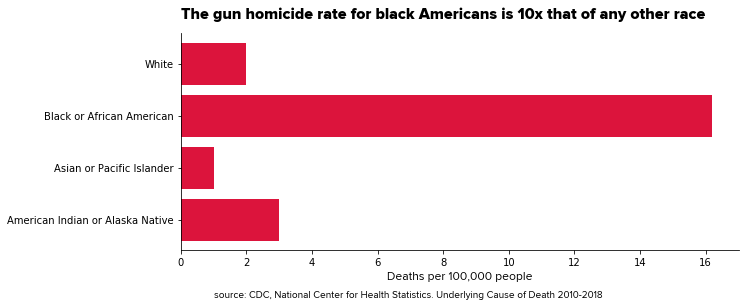

In [35]:
##race horiztonal bar chart


#read in data
suicide_race = pd.read_csv('Suicides by Gun, 2010-2018, by Race.csv')
homicide_race  = pd.read_csv('Homicide Gun Deaths, 2010-2018, by Race.csv')
overall_race = pd.read_csv('All Gun Deaths, 2010-2018, by Race.csv')

#make figure
fig, ax = plt.subplots(figsize=(10, 4))

#make bar chart
plt.barh(suicide_race['Race'], suicide_race['Crude Rate'], color='#DC143C')

#add title
plt.title('The gun suicide rate for white Americans is 2x that of any other race', loc='left', pad=15,
         fontdict={'fontsize':16, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova')

#add labels & annotations
plt.xlabel('Deaths per 100,000 people', fontsize=12, fontname='Proxima Nova')

plt.text(1,-1.5,'source: CDC, National Center for Health Statistics. Underlying Cause of Death 2010-2018',
         fontsize=10, ha='left', fontname='Proxima Nova')

#hide spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

#make second figure
fig, ax = plt.subplots(figsize=(10, 4))

#make bar chart
plt.barh(homicide_race['Race'], homicide_race['Crude Rate'], color='#DC143C')

#add title
plt.title('The gun homicide rate for black Americans is 10x that of any other race', loc='left', pad=15,
         fontdict={'fontsize':16, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova')

#add labels & annotations
plt.xlabel('Deaths per 100,000 people', fontsize=12, fontname='Proxima Nova')
plt.text(1,-1.5,'source: CDC, National Center for Health Statistics. Underlying Cause of Death 2010-2018',
         fontsize=10, ha='left', fontname='Proxima Nova')

#hide spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()




In [31]:
#gun ownership by state

#plot with Plotly
import plotly.graph_objects as go 

df3 = pd.read_csv('Gun Ownership by State, 2020.csv')


fig = go.Figure(data=go.Choropleth(
    locations=df3['Code'], # Spatial coordinates
    z = df3['gunOwnership'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Percent of residents owning a gun",
))

fig.update_layout(
    title_text = '<b>Estimated gun ownership by state: 2020</b>',
    geo_scope='usa', # limite map scope to USA
)

fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=0.5,
            y=-0.15,
            showarrow=False,
            text="source: Pew Research Center",
            xref="paper",
            yref="paper",

        )
    ]
)

fig.show()


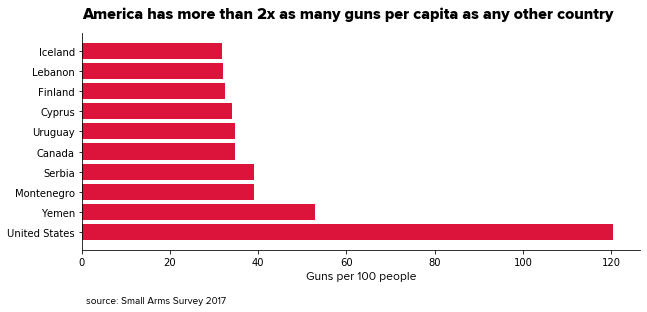

In [34]:
dfo = pd.read_csv('GunOwnershipByCountry.csv')

#make figure
fig, ax = plt.subplots(figsize=(10, 4))

#make bar chart
plt.barh(dfo['country'], dfo['gunsPer100People'], color='#DC143C', )

#add title
plt.title('America has more than 2x as many guns per capita as any other country', loc='left', pad=15,
         fontdict={'fontsize':16, 'fontweight':'bold', 'family':'sans-serif' }, fontname='Proxima Nova')

#add title and annotations
plt.xlabel('Guns per 100 people', fontsize=12, fontname='Proxima Nova')
plt.text(1,-3.5,'source: Small Arms Survey 2017',
         fontsize=10, ha='left', fontname='Proxima Nova')


#hide spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()